KNB

In [54]:
# import library yang diperlukan
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np

In [55]:
# Importing the dataset
iris = pd.read_csv('https://raw.githubusercontent.com/ranianuraini/datamining/gh-pages/dataR2.csv')

In [56]:
#looking at the first 5 values of the dataset
iris.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [57]:
#Spliting the dataset in independent and dependent variables
X = iris.iloc[:,:4].values
y = iris['Classification'].values

In [58]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 82)

In [59]:
# Feature Scaling to bring the variable in a single scale
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [60]:
# Fitting Naive Bayes Classification to the Training set with linear kernel
from sklearn.naive_bayes import GaussianNB
nvclassifier = GaussianNB()
nvclassifier.fit(X_train, y_train)

GaussianNB()

In [61]:
# Predicting the Test set results
y_pred = nvclassifier.predict(X_test)
print(y_pred)

[1 1 1 1 1 1 2 1 1 2 1 1 1 1 1 1 1 2 1 1 1 1 2 2]


In [62]:
#lets see the actual and predicted value side by side
y_compare = np.vstack((y_test,y_pred)).T
#actual value on the left side and predicted value on the right hand side
#printing the top 5 values
y_compare[:5,:]

array([[2, 1],
       [1, 1],
       [2, 1],
       [2, 1],
       [1, 1]])

In [63]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[10  1]
 [ 9  4]]


In [64]:
#finding accuracy from the confusion matrix.
a = cm.shape
corrPred = 0
falsePred = 0

In [65]:
for row in range(a[0]):
    for c in range(a[1]):
        if row == c:
            corrPred +=cm[row,c]
        else:
            falsePred += cm[row,c]
print('Correct predictions: ', corrPred)
print('False predictions', falsePred)
print ('\n\nAccuracy of the Naive Bayes Clasification is: ', corrPred/(cm.sum()))

Correct predictions:  14
False predictions 10


Accuracy of the Naive Bayes Clasification is:  0.5833333333333334


DESISION TREE

In [37]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns

url = 'https://raw.githubusercontent.com/ranianuraini/datamining/gh-pages/dataR2.csv'
data = pd.read_csv(url)

In [38]:
data

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1
...,...,...,...,...,...,...,...,...,...,...
111,45,26.850000,92,3.330,0.755688,54.6800,12.100000,10.96000,268.230,2
112,62,26.840000,100,4.530,1.117400,12.4500,21.420000,7.32000,330.160,2
113,65,32.050000,97,5.730,1.370998,61.4800,22.540000,10.33000,314.050,2
114,72,25.590000,82,2.820,0.570392,24.9600,33.750000,3.27000,392.460,2


In [39]:
y = data["Classification"]
X = data.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

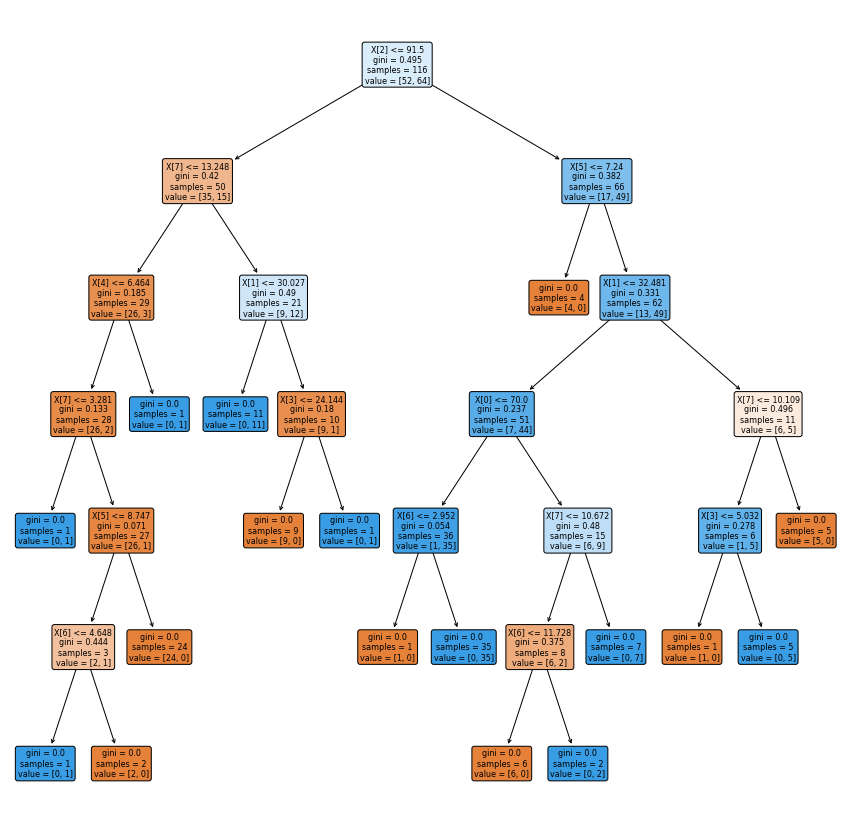

In [40]:
#plt the figure, setting a black background
plt.figure(figsize=(15,15))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()